In [1221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [1222]:
# Load the dataset
file_path = 'implant2.csv'  # Adjust the path accordingly
data1 = pd.read_csv(file_path)
data = data1.drop(columns=['laterality']) 

In [1223]:
data1.head()

,age,cancer,implant,laterality
0,61.0,0,0,L
1,61.0,0,0,L
2,61.0,0,0,R
3,61.0,0,0,R
4,55.0,0,0,L


In [1224]:
# Explore the dataset
print(data.head())

    age  cancer  implant
0  61.0       0        0
1  61.0       0        0
2  61.0       0        0
3  61.0       0        0
4  55.0       0        0


In [1225]:
#Check for missing value
data.isnull().sum()

age        37
cancer      0
implant     0
dtype: int64

In [1226]:
#Data Processing for missing values
data['age'] = data['age'].fillna(data['age'].mean())

In [1227]:
#Check for missing value
data.isnull().sum()

age        0
cancer     0
implant    0
dtype: int64

In [1228]:
data.describe()

,age,cancer,implant
count,54706.000000,54706.000000,54706.000000
mean,58.543928,0.021168,0.026999
std,10.047484,0.143944,0.162081
min,26.000000,0.000000,0.000000
25%,51.000000,0.000000,0.000000
50%,59.000000,0.000000,0.000000
75%,66.000000,0.000000,0.000000
max,89.000000,1.000000,1.000000


In [1229]:
# Split the dataset into features (X) and target variable (y)
X = data[['age', 'implant']]
y = data['cancer']


In [1230]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1231]:
# Initialize the logistic regression model
model = LogisticRegression()


In [1232]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [1233]:
# Make predictions based on specific input (age,implant) 
y_pred = model.predict([[60,1]])
y_pred

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [1234]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [1235]:
# Calculate the frequency of each class in y_pred
unique, counts = np.unique(y_pred, return_counts=True)
class_freq = dict(zip(unique, counts))
print(class_freq)

{0: 10942}


In [1236]:
# Finding the accuracy of logistic regression
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9788886857978432


In [1237]:
classification_report_output = classification_report(y_test, y_pred)
classification_report_output

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99     10711\n           1       0.00      0.00      0.00       231\n\n    accuracy                           0.98     10942\n   macro avg       0.49      0.50      0.49     10942\nweighted avg       0.96      0.98      0.97     10942\n'

In [1238]:
# Initialize the Decision tress model
model_new = DecisionTreeClassifier()

In [1239]:
# Make predictions on the test set
model_new.fit(X_train,y_train)
prediction = model_new.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [1240]:
# Calculate the frequency of each class in prediction
unique, counts = np.unique(prediction, return_counts=True)
class_freq = dict(zip(unique, counts))
print(class_freq)

{0: 10942}


In [1241]:
# Accuracy score using decision trees
score = accuracy_score(y_test,prediction)
score

0.9788886857978432

In [1242]:
classification_report_output = classification_report(y_test, prediction)
classification_report_output

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99     10711\n           1       0.00      0.00      0.00       231\n\n    accuracy                           0.98     10942\n   macro avg       0.49      0.50      0.49     10942\nweighted avg       0.96      0.98      0.97     10942\n'

In [1243]:
# Evaluate the logistic  model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10711,     0],
       [  231,     0]])

In [1244]:
# Evaluate the decision tree  model
conf_matrix2 = confusion_matrix(y_test, prediction)
conf_matrix2

array([[10711,     0],
       [  231,     0]])

In [1245]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,age,cancer,implant
age,1.000000,0.075155,-0.069599
cancer,0.075155,1.000000,-0.014311
implant,-0.069599,-0.014311,1.000000


In [1246]:
# Create a cross-tabulation (contingency table)
contingency_table = pd.crosstab(data['cancer'], data['implant'])


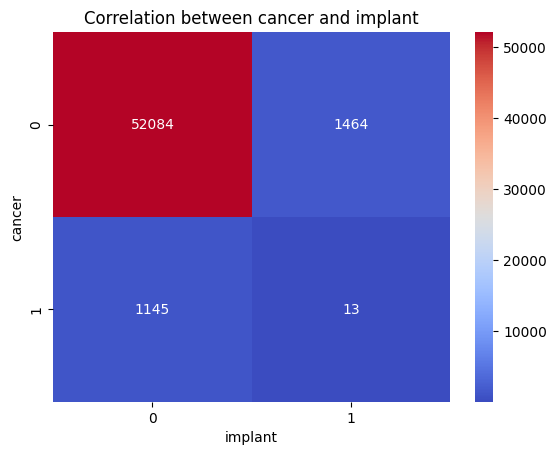

In [1247]:
# Plot the cross-tabulation as a heatmap
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt="d")
plt.title('Correlation between cancer and implant')
plt.show()

###**Class distribution**

In [1248]:
X = data.drop(['cancer'], axis=1)
y = data['cancer']

<Axes: ylabel='count'>

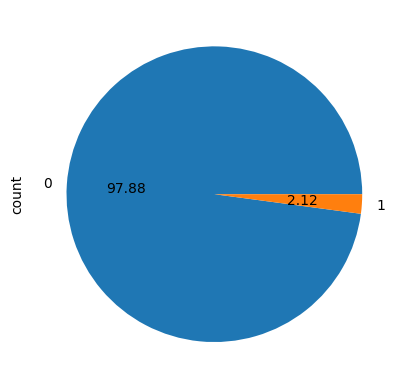

In [1249]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

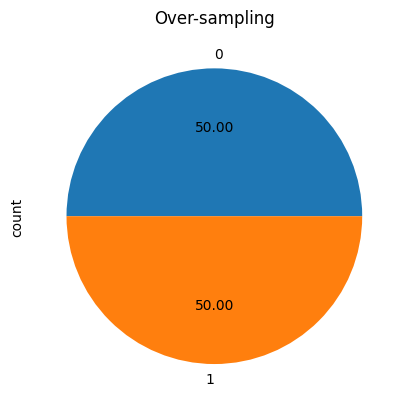

In [1250]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [1251]:
X_res.count

<bound method DataFrame.count of          age  implant
0       61.0        0
1       61.0        0
2       61.0        0
3       61.0        0
4       55.0        0
...      ...      ...
107091  50.0        0
107092  56.0        0
107093  77.0        0
107094  53.0        0
107095  53.0        0

[107096 rows x 2 columns]>

In [1252]:
y_res.value_counts()

cancer
0    53548
1    53548
Name: count, dtype: int64

In [1253]:
sample_count = y_res.shape[0]
print(sample_count)

107096


In [1254]:
# Split the dataset into features (X) and target variable (y)
X_res = X_res[['age', 'implant']]
y_res = y_res

In [1255]:
# Split the data into training and testing sets
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [1256]:
# Initialize the logistic regression model
model = LogisticRegression()

In [1257]:
# Train the model
model.fit(X_res_train, y_res_train)

LogisticRegression()

In [1258]:
# Make predictions on the test set
y_res_pred = model.predict(X_res_test)
y_res_pred

array([0, 1, 0, ..., 1, 1, 1])

In [1259]:
len(y_res_pred)

21420

In [1260]:
# Calculate the frequency of each class in y_pred
unique, counts = np.unique(y_res_pred, return_counts=True)
class_freq = dict(zip(unique, counts))
print(class_freq)

{0: 10197, 1: 11223}


In [1261]:
# Finding the accuracy of logistic regression
accuracy = accuracy_score(y_res_test, y_res_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.611764705882353


In [1262]:
classification_report_output_res = classification_report(y_res_test, y_res_pred)

In [1263]:
print(classification_report_output_res)

              precision    recall  f1-score   support

           0       0.62      0.59      0.60     10761
           1       0.60      0.64      0.62     10659

    accuracy                           0.61     21420
   macro avg       0.61      0.61      0.61     21420
weighted avg       0.61      0.61      0.61     21420



In [1264]:
# Initialize the Decision tress model
model_new = DecisionTreeClassifier()

In [1265]:
# Make predictions on the test set
model_new.fit(X_res_train,y_res_train)
prediction = model_new.predict(X_res_test)
prediction

array([0, 1, 0, ..., 1, 1, 1])

In [1266]:
# Calculate the frequency of each class in prediction
unique, counts = np.unique(prediction, return_counts=True)
class_freq = dict(zip(unique, counts))
print(class_freq)

{0: 12722, 1: 8698}


In [1267]:
# Accuracy score using decision trees
score = accuracy_score(y_res_test,prediction)
score

0.6324463118580765

In [1268]:
classification_report_output = classification_report(y_res_test, prediction)

In [1269]:
print(classification_report_output)

              precision    recall  f1-score   support

           0       0.61      0.73      0.66     10761
           1       0.66      0.54      0.59     10659

    accuracy                           0.63     21420
   macro avg       0.64      0.63      0.63     21420
weighted avg       0.64      0.63      0.63     21420



In [1270]:
# Evaluate the logistic  model
conf_matrix = confusion_matrix(y_res_test, y_res_pred)
conf_matrix

array([[6321, 4440],
       [3876, 6783]])

In [1271]:
# Evaluate the decision tree  model
conf_matrix2 = confusion_matrix(y_res_test, prediction)
conf_matrix2

array([[7805, 2956],
       [4917, 5742]])

In [1272]:
# Create a cross-tabulation (contingency table)
contingency_table_res = pd.crosstab(y_res, X_res['implant'])

In [1273]:
contingency_table_res

implant,0,1
cancer,,
0,52084,1464
1,52948,600


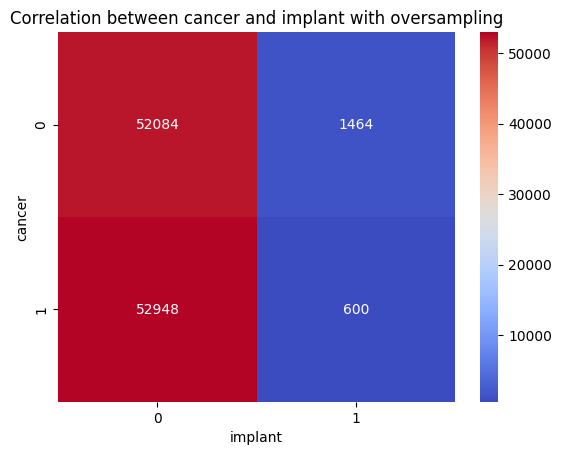

In [1362]:
# Plot the cross-tabulation as a heatmap
sns.heatmap(contingency_table_res, annot=True, cmap='coolwarm', fmt="d")
plt.title('Correlation between cancer and implant with oversampling')
plt.show()

##**DATASET AGE RANGE FROM 20 to 40**

Count of samples before oversampling:
cancer
0    1331
1      13
Name: count, dtype: int64

Count of samples after oversampling:
cancer
0    1331
1    1331
Name: count, dtype: int64


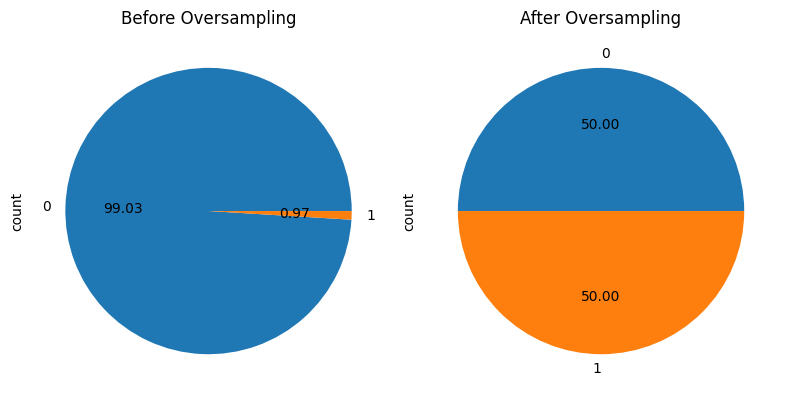

In [1275]:
# Filter the DataFrame to include only rows where age is in the range 20 to 40
age20_to_40 = data[(data['age'] >= 20) & (data['age'] <= 40)]

# Split the filtered dataset into features (X) and target variable (y)
X1_train = age20_to_40[['age', 'implant']]
y1_train = age20_to_40['cancer']

# Count of samples before oversampling
print("Count of samples before oversampling:")
print(y1_train.value_counts())

# Plot pie chart before oversampling
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
y1_train.value_counts().plot.pie(autopct='%.2f')
plt.title('Before Oversampling')

# Oversampling only the filtered data
ros = RandomOverSampler(sampling_strategy="not majority")
X1_train_res, y1_train_res = ros.fit_resample(X1_train, y1_train)

# Count of samples after oversampling
print("\nCount of samples after oversampling:")
print(y1_train_res.value_counts())

# Plot pie chart after oversampling
plt.subplot(1, 2, 2)
y1_train_res.value_counts().plot.pie(autopct='%.2f')
plt.title('After Oversampling')

plt.tight_layout()
plt.show()

In [1276]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_train_res, y1_train_res, test_size=0.2, random_state=42)

In [1277]:
# Initialize the logistic regression model
model = LogisticRegression()

In [1278]:
# Train the model
model.fit(X1_train_res, y1_train_res)

LogisticRegression()

In [1279]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have already trained your logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X1_train, y1_train)

# Predict on the test set
y1_pred = logistic_model.predict(X1_test)

# Calculate accuracy
accuracy = accuracy_score(y1_test, y1_pred)

print("Accuracy:", accuracy)


Accuracy: 0.5647279549718575


In [1280]:
# Make predictions on the test set
y_pred1 = model.predict(X1_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,

In [1281]:
len(y_pred1)

533

In [1282]:
# Calculate the frequency of each class in y_pred
unique, counts = np.unique(y_pred1, return_counts=True)
class_freq = dict(zip(unique, counts))
print(class_freq)

{0: 149, 1: 384}


In [1283]:
classification_report_output1 = classification_report(y1_test, y1_pred)

In [1284]:
print(classification_report_output1)

              precision    recall  f1-score   support

           0       0.64      0.35      0.45       275
           1       0.53      0.79      0.64       258

    accuracy                           0.56       533
   macro avg       0.59      0.57      0.55       533
weighted avg       0.59      0.56      0.54       533



In [1285]:
# Initialize the Decision tress model
model_new = DecisionTreeClassifier()

In [1286]:
# Make predictions on the test set
model_new.fit(X1_train_res,y1_train_res)
prediction1 = model_new.predict(X1_test)
prediction1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [1287]:
# Calculate the frequency of each class in prediction
unique, counts = np.unique(prediction1, return_counts=True)
class_freq = dict(zip(unique, counts))
print(class_freq)

{0: 73, 1: 460}


In [1288]:
# Accuracy score using decision trees
score1 = accuracy_score(y1_test,prediction1)
score1

0.6210131332082551

In [1289]:
classification_report_output_1 = classification_report(y1_test, prediction1)

In [1290]:
print(classification_report_output_1)

              precision    recall  f1-score   support

           0       1.00      0.27      0.42       275
           1       0.56      1.00      0.72       258

    accuracy                           0.62       533
   macro avg       0.78      0.63      0.57       533
weighted avg       0.79      0.62      0.56       533



In [1291]:
# Evaluate the decision tree  model
conf_matrix2 = confusion_matrix(y1_test, prediction1)
conf_matrix2

array([[ 73, 202],
       [  0, 258]])

In [1292]:
# Evaluate the logistic  model
conf_matrix = confusion_matrix(y1_test, y1_pred)
conf_matrix

array([[ 96, 179],
       [ 53, 205]])

In [1293]:
# Calculate the correlation matrix
correlation_matrix1 = age20_to_40.corr()
correlation_matrix1

,age,cancer,implant
age,1.000000,0.032381,-0.012235
cancer,0.032381,1.000000,-0.024697
implant,-0.012235,-0.024697,1.000000


In [1294]:
# Create a cross-tabulation (contingency table)
contingency_table1 = pd.crosstab(age20_to_40['cancer'], age20_to_40['implant'])

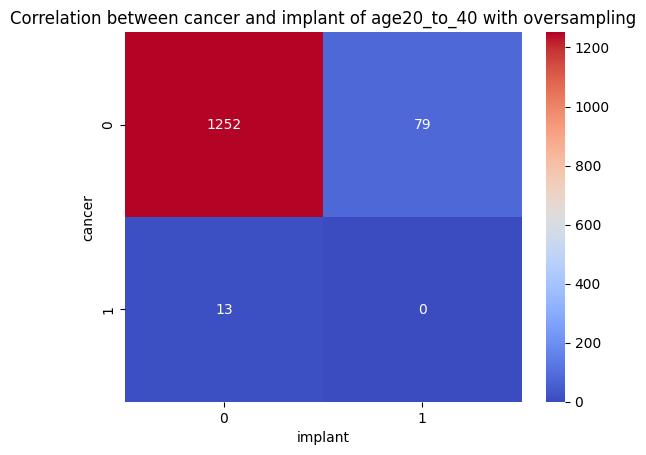

In [1364]:
# Plot the cross-tabulation as a heatmap
sns.heatmap(contingency_table1, annot=True, cmap='coolwarm', fmt="d")
plt.title('Correlation between cancer and implant of age20_to_40 with oversampling')
plt.show()

##**DATASET AGE RANGE FROM 41 to 60**

Count of samples before oversampling:
cancer
0    23514
1    23428
Name: count, dtype: int64

Count of samples after oversampling:
cancer
1    23514
0    23514
Name: count, dtype: int64


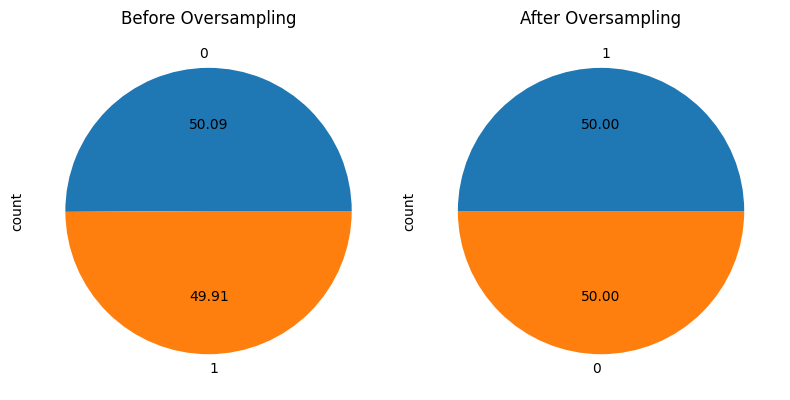

In [1296]:
import matplotlib.pyplot as plt

# Count of samples before oversampling
print("Count of samples before oversampling:")
print(y2_train.value_counts())

# Plot pie chart before oversampling
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
y2_train.value_counts().plot.pie(autopct='%.2f')
plt.title('Before Oversampling')

# Oversampling only the filtered data
ros = RandomOverSampler(sampling_strategy="not majority")
X2_train_res, y2_train_res = ros.fit_resample(X2_train, y2_train)

# Count of samples after oversampling
print("\nCount of samples after oversampling:")
print(y2_train_res.value_counts())

# Plot pie chart after oversampling
plt.subplot(1, 2, 2)
y2_train_res.value_counts().plot.pie(autopct='%.2f')
plt.title('After Oversampling')

plt.tight_layout()
plt.show()



In [1297]:
# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_train_res, y2_train_res, test_size=0.2, random_state=42)

In [1298]:
print(y2_train_res)

0        1
1        0
2        0
3        0
4        0
        ..
47023    1
47024    1
47025    1
47026    1
47027    1
Name: cancer, Length: 47028, dtype: int64


In [1299]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have already trained your logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X2_train_res, y2_train_res)

# Predict on the test set
y2_pred = logistic_model.predict(X2_test)

# Calculate accuracy
accuracy2 = accuracy_score(y2_test, y2_pred)

print("Accuracy:", accuracy2)


Accuracy: 0.551988092706783


In [1300]:
# Make predictions on the test set
y2_pred = model.predict(X2_test)
y2_pred

array([1, 0, 1, ..., 1, 1, 1])

In [1301]:
len(y2_pred)

9406

In [1302]:
# Calculate the frequency of each class in y_pred
unique, counts = np.unique(y2_pred, return_counts=True)
class_freq = dict(zip(unique, counts))
print(class_freq)

{0: 90, 1: 9316}


In [1303]:
classification_report_output2= classification_report(y2_test, y2_pred)

In [1304]:
print(classification_report_output2)

              precision    recall  f1-score   support

           0       1.00      0.02      0.04      4712
           1       0.50      1.00      0.67      4694

    accuracy                           0.51      9406
   macro avg       0.75      0.51      0.35      9406
weighted avg       0.75      0.51      0.35      9406



In [1305]:
# Initialize the Decision tress model
model_new = DecisionTreeClassifier()

In [1306]:
# Make predictions on the test set
model_new.fit(X2_train_res,y2_train_res)
prediction2 = model_new.predict(X2_test)
prediction2

array([0, 0, 0, ..., 0, 1, 0])

In [1307]:
# Calculate the frequency of each class in prediction
unique, counts = np.unique(prediction2, return_counts=True)
class_freq = dict(zip(unique, counts))
print(class_freq)

{0: 4012, 1: 5394}


In [1308]:
# Accuracy score using decision trees
score2 = accuracy_score(y2_test,prediction2)
score2

0.5785668722092282

In [1309]:
classification_report_output_2 = classification_report(y2_test, prediction2)

In [1310]:
print(classification_report_output_2)

              precision    recall  f1-score   support

           0       0.59      0.51      0.55      4712
           1       0.57      0.65      0.61      4694

    accuracy                           0.58      9406
   macro avg       0.58      0.58      0.58      9406
weighted avg       0.58      0.58      0.58      9406



In [1311]:
# Calculate the correlation matrix
correlation_matrix2 = age41_to_60.corr()
correlation_matrix2

,age,cancer,implant
age,1.000000,0.025594,-0.059111
cancer,0.025594,1.000000,-0.015115
implant,-0.059111,-0.015115,1.000000


In [1312]:
# Evaluate the decision tree  model
conf_matrix2 = confusion_matrix(y2_test, prediction2)
conf_matrix2

array([[2380, 2332],
       [1632, 3062]])

In [1313]:
# Evaluate the logistic  model
conf_matrix = confusion_matrix(y2_test, y2_pred)
conf_matrix

array([[  90, 4622],
       [   0, 4694]])

In [1314]:
# Create a cross-tabulation (contingency table)
contingency_table2 = pd.crosstab(age41_to_60['cancer'], age41_to_60['implant'])
contingency_table2

implant,0,1
cancer,,
0,28356,983
1,396,4


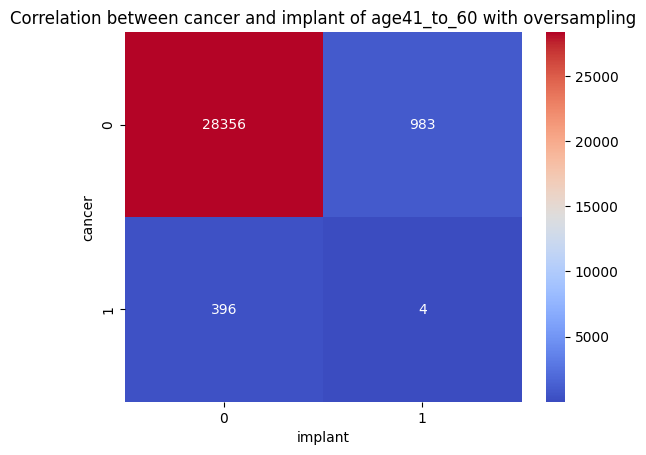

In [1365]:
# Plot the cross-tabulation as a heatmap
sns.heatmap(contingency_table2, annot=True, cmap='coolwarm', fmt="d")
plt.title('Correlation between cancer and implant of age41_to_60 with oversampling')
plt.show()

##**DATASET AGE RANGE FROM 61 and Above**

In [1316]:
# Filter the DataFrame to include only rows where age is in the range 61 and above
age61_and_above = data[data['age'] >= 61]

# Split the filtered dataset into features (X) and target variable (y)
X3_train = age61_and_above[['age', 'implant']]
y3_train = age61_and_above['cancer']

# Perform oversampling
ros = RandomOverSampler(sampling_strategy="not majority")
X3_train_res, y3_train_res = ros.fit_resample(X3_train, y3_train)


Count of samples before oversampling:
cancer
0    22878
1      745
Name: count, dtype: int64

Count of samples after oversampling:
cancer
0    22878
1    22878
Name: count, dtype: int64


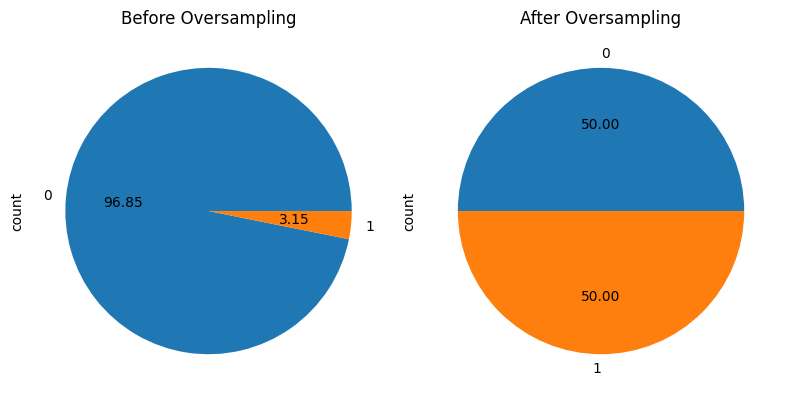

In [1317]:
import matplotlib.pyplot as plt

# Count of samples before oversampling
print("Count of samples before oversampling:")
print(y3_train.value_counts())

# Plot pie chart before oversampling
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
y3_train.value_counts().plot.pie(autopct='%.2f')
plt.title('Before Oversampling')

# Oversampling only the filtered data
ros = RandomOverSampler(sampling_strategy="not majority")
X3_train_res, y3_train_res = ros.fit_resample(X3_train, y3_train)

# Count of samples after oversampling
print("\nCount of samples after oversampling:")
print(y3_train_res.value_counts())

# Plot pie chart after oversampling
plt.subplot(1, 2, 2)
y3_train_res.value_counts().plot.pie(autopct='%.2f')
plt.title('After Oversampling')

plt.tight_layout()
plt.show()

In [1318]:
# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_train_res, y3_train_res, test_size=0.2, random_state=42)

In [1319]:
print(y3_train_res)

0        0
1        0
2        0
3        0
4        0
        ..
45751    1
45752    1
45753    1
45754    1
45755    1
Name: cancer, Length: 45756, dtype: int64


In [1320]:
print("Shape of X3_train_res:", X3_train_res.shape)
print("Shape of y3_train_res:", y3_train_res.shape)

Shape of X3_train_res: (45756, 2)
Shape of y3_train_res: (45756,)


In [1321]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have already trained your logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X3_train_res, y3_train_res)

# Predict on the test set
y3_pred = logistic_model.predict(X3_test)

# Calculate accuracy
accuracy3 = accuracy_score(y3_test, y3_pred)

print("Accuracy:", accuracy3)

Accuracy: 0.5783435314685315


In [1322]:
# Make predictions on the test set
y3_pred = model.predict(X3_test)
y3_pred

array([1, 1, 1, ..., 1, 1, 1])

In [1323]:
len(y3_pred)

9152

In [1324]:
# Calculate the frequency of each class in y_pred
unique, counts = np.unique(y3_pred, return_counts=True)
class_freq = dict(zip(unique, counts))
print(class_freq)

{1: 9152}


In [1325]:
classification_report_output3= classification_report(y3_test, y3_pred)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [1326]:
print(classification_report_output3)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4564
           1       0.50      1.00      0.67      4588

    accuracy                           0.50      9152
   macro avg       0.25      0.50      0.33      9152
weighted avg       0.25      0.50      0.33      9152



In [1327]:
# Initialize the Decision tress model
model_new = DecisionTreeClassifier()

In [1328]:
# Make predictions on the test set
model_new.fit(X3_train_res,y3_train_res)
prediction3 = model_new.predict(X3_test)
prediction3

array([0, 0, 1, ..., 0, 1, 0])

In [1329]:
# Calculate the frequency of each class in prediction
unique, counts = np.unique(prediction3, return_counts=True)
class_freq = dict(zip(unique, counts))
print(class_freq)

{0: 5093, 1: 4059}


In [1330]:
# Accuracy score using decision trees
score3 = accuracy_score(y3_test,prediction3)
score3

0.6008522727272727

In [1331]:
classification_report_output_3 = classification_report(y3_test, prediction3)

In [1332]:
print(classification_report_output_3)

              precision    recall  f1-score   support

           0       0.59      0.66      0.62      4564
           1       0.62      0.54      0.58      4588

    accuracy                           0.60      9152
   macro avg       0.60      0.60      0.60      9152
weighted avg       0.60      0.60      0.60      9152



In [1333]:
# Calculate the correlation matrix
correlation_matrix3 = age61_and_above.corr()
correlation_matrix3

,age,cancer,implant
age,1.000000,0.058185,-0.016904
cancer,0.058185,1.000000,-0.007339
implant,-0.016904,-0.007339,1.000000


In [1334]:
# Evaluate the decision tree  model
conf_matrix3 = confusion_matrix(y3_test, prediction3)
conf_matrix3

array([[3002, 1562],
       [2091, 2497]])

In [1335]:
# Evaluate the logistic  model
conf_matrix = confusion_matrix(y3_test, y3_pred)
conf_matrix

array([[   0, 4564],
       [   0, 4588]])

In [1336]:
# Create a cross-tabulation (contingency table)
contingency_table3 = pd.crosstab(age61_and_above['cancer'], age61_and_above['implant'])

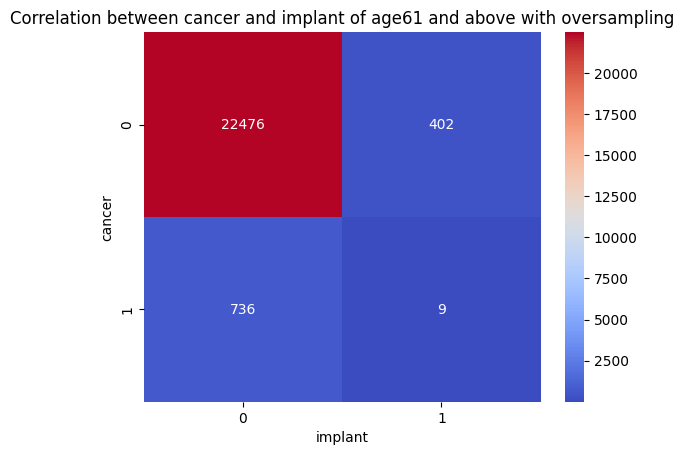

In [1366]:
# Plot the cross-tabulation as a heatmap
sns.heatmap(contingency_table3, annot=True, cmap='coolwarm', fmt="d")
plt.title('Correlation between cancer and implant of age61 and above with oversampling')
plt.show()

In [1338]:
data1.head()

,age,cancer,implant,laterality
0,61.0,0,0,L
1,61.0,0,0,L
2,61.0,0,0,R
3,61.0,0,0,R
4,55.0,0,0,L


##**LATERALITY**

In [1339]:
#Data Processing for missing values
data1['age'] = data['age'].fillna(data['age'].mean())

In [1340]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode 'laterality'
data1['laterality_encoded'] = label_encoder.fit_transform(data1['laterality'])

# Display the DataFrame with encoded 'laterality'
print(data1.head())

    age  cancer  implant laterality  laterality_encoded
0  61.0       0        0          L                   0
1  61.0       0        0          L                   0
2  61.0       0        0          R                   1
3  61.0       0        0          R                   1
4  55.0       0        0          L                   0


In [1341]:
#'data1' is your DataFrame
data1 = data1.drop(columns=['laterality'])

# Display the DataFrame without the 'laterality' column
print(data1.head())

    age  cancer  implant  laterality_encoded
0  61.0       0        0                   0
1  61.0       0        0                   0
2  61.0       0        0                   1
3  61.0       0        0                   1
4  55.0       0        0                   0


In [1342]:
data1.count()

age                   54706
cancer                54706
implant               54706
laterality_encoded    54706
dtype: int64

In [1343]:
from imblearn.over_sampling import RandomOverSampler

# Assuming 'data1' is your DataFrame
X = data1.drop(columns=['cancer'])  # Assuming 'cancer' is your target variable
y = data1['cancer']

# Perform oversampling
ros = RandomOverSampler(sampling_strategy='not majority')
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
data1_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data1_resampled['cancer'] = y_resampled

# Display the resampled DataFrame
print(data1_resampled.head())


    age  implant  laterality_encoded  cancer
0  61.0        0                   0       0
1  61.0        0                   0       0
2  61.0        0                   1       0
3  61.0        0                   1       0
4  55.0        0                   0       0


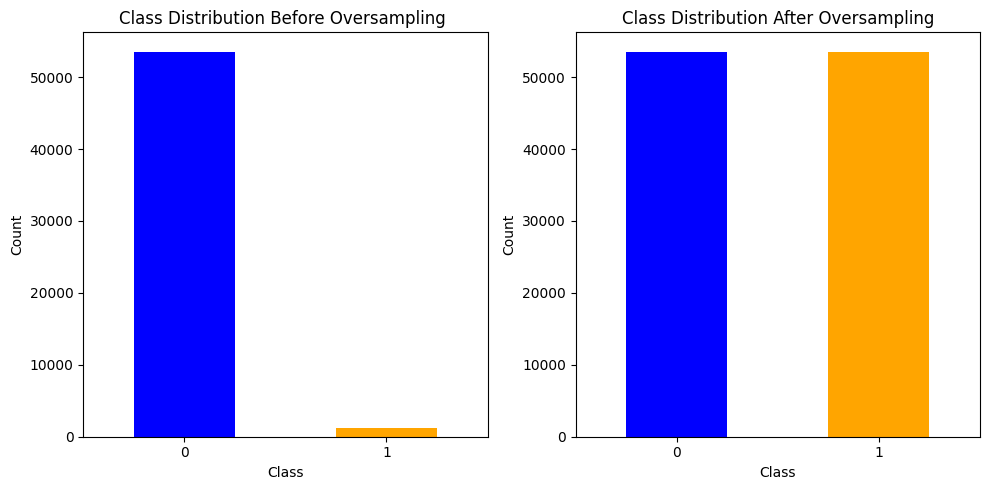

In [1344]:
import matplotlib.pyplot as plt

# Plot counts of each class before oversampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data1['cancer'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution Before Oversampling ')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Plot counts of each class after oversampling
plt.subplot(1, 2, 2)
data1_resampled['cancer'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [1345]:
# Split the resampled data into features (X) and the target variable (y)
X_resampled = data1_resampled.drop(columns=['cancer'])
y_resampled = data1_resampled['cancer']

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [1346]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have already trained your logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6150793650793651


In [1347]:
# Make predictions on the test set
y4_pred = logistic_model.predict(X_test)
y4_pred

array([0, 0, 0, ..., 1, 1, 0])

In [1348]:
# Calculate the frequency of each class in y_pred
unique, counts = np.unique(y_pred, return_counts=True)
class_freq = dict(zip(unique, counts))
print(class_freq)

{0: 10126, 1: 11294}


In [1349]:
classification_report_output= classification_report(y_test, y_pred)

In [1350]:
print(classification_report_output)

              precision    recall  f1-score   support

           0       0.62      0.59      0.61     10761
           1       0.61      0.64      0.62     10659

    accuracy                           0.62     21420
   macro avg       0.62      0.62      0.61     21420
weighted avg       0.62      0.62      0.61     21420



In [1351]:
# Initialize the Decision tress model
model_new = DecisionTreeClassifier()

In [1352]:
X_train

,age,implant,laterality_encoded
45677,60.0,0,1
38606,56.0,0,0
79669,59.0,0,1
43448,69.0,0,1
13094,63.0,0,0
...,...,...,...
54886,74.0,0,0
76820,59.0,0,0
103694,63.0,0,1
860,50.0,0,1


In [1353]:
# Make predictions on the test set
model_new.fit(X_train,y_train)
prediction = model_new.predict(X_test)
prediction

array([1, 0, 1, ..., 1, 1, 0])

In [1354]:
# Calculate the frequency of each class in prediction
unique, counts = np.unique(prediction, return_counts=True)
class_freq = dict(zip(unique, counts))
print(class_freq)

{0: 10941, 1: 10479}


In [1355]:
# Accuracy score using decision trees
score = accuracy_score(y_test,prediction)
score

0.6436974789915967

In [1356]:
classification_report_output = classification_report(y_test, prediction)

In [1357]:
print(classification_report_output)

              precision    recall  f1-score   support

           0       0.64      0.65      0.65     10761
           1       0.64      0.63      0.64     10659

    accuracy                           0.64     21420
   macro avg       0.64      0.64      0.64     21420
weighted avg       0.64      0.64      0.64     21420



In [1358]:
# Calculate the correlation matrix with laterality
correlation_matrix = data1.corr()
correlation_matrix

,age,cancer,implant,laterality_encoded
age,1.000000,0.075155,-0.069599,-0.001039
cancer,0.075155,1.000000,-0.014311,-0.002748
implant,-0.069599,-0.014311,1.000000,0.000040
laterality_encoded,-0.001039,-0.002748,0.000040,1.000000


In [1359]:
# Evaluate the decision tree  model
conf_matrix = confusion_matrix(y_test, prediction)
conf_matrix

array([[7035, 3726],
       [3906, 6753]])

In [1360]:
# Evaluate the logistic  model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[6321, 4440],
       [3805, 6854]])

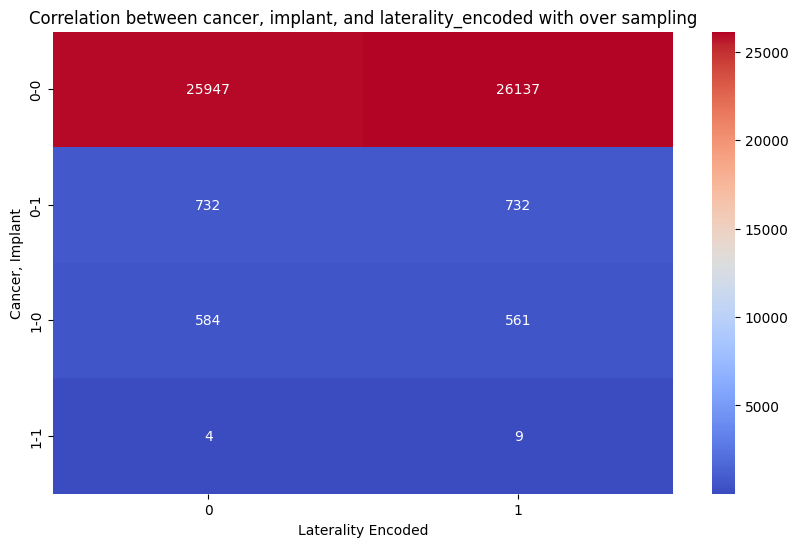

In [1367]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation (contingency table) with 'cancer', 'laterality_encoded', and 'implant'
contingency_table = pd.crosstab([data1['cancer'], data1['implant']], data1['laterality_encoded'])

# Plot the cross-tabulation as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt="d")
plt.title('Correlation between cancer, implant, and laterality_encoded with over sampling')
plt.xlabel('Laterality Encoded')
plt.ylabel('Cancer, Implant')
plt.show()
